In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Integration...done
Data clean...done
Animation...


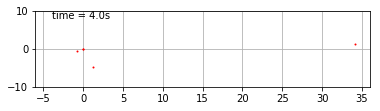

In [6]:
#Verlet
def init(m,x,v):
    M = np.zeros(2*N).reshape((N,2))
    X = np.zeros(2*N).reshape((N,2))
    V = np.zeros(2*N).reshape((N,2))
    for i in range(N):
        for j in range(2):
            M[i,j]=m[i]
            X[i,j]=x[i][j]
            V[i,j]=v[i][j]
    return M,X,V

def updateX(M,X,V,F,dt):
    f = np.divide(F,M)
    X = np.add(  np.add(X,V*dt)   ,0.5*f*dt*dt)
    return X

def updateV(M,V,F,F_old,dt):
    f     = np.divide(F    ,M)
    f_old = np.divide(F_old,M)
    V     = np.add(V,0.5*np.add(f,f_old)*dt)
    return V

def updateF(M,X):
    Fij           = np.zeros(2*N*N).reshape((N,N,2))
    distMatrixVec = np.zeros(2*N*N).reshape((N,N,2))
    distMatrix    = np.zeros(  N*N).reshape((N,N))
    F             = np.zeros(2*N  ).reshape((N,2))
    ones          = np.diag(np.ones(N))
    
    MT = M.T[0,:]
    MM = np.multiply(MT.reshape((1,N)),MT.reshape((N,1)))
    
    for i in range(N):
        for j in range(i):
            tmp                 = np.subtract(X[i],X[j])
            distMatrixVec[i][j] = tmp
            distMatrixVec[j][i] = -tmp
    distMatrix = np.linalg.norm(distMatrixVec,axis=2)
    Fij        = np.power(distMatrix + ones ,-3)
    Fij        = np.subtract(Fij,ones)
    Fij        = np.einsum('ijk,ij->ijk', distMatrixVec , np.multiply(Fij,MM) )
    F          = Fij.sum(axis=0)
    return F

def timeIntegration(m,x,v,T):
    xHist = []
    M,X,V = init(m,x,v)
    F     = updateF(M,X)
    for t in np.arange(0,T,dt):
        #print('time',t)
        X     = updateX(M,X,V,F,dt)
        F_old = F.copy()
        F     = updateF(M,X)
        V     = updateV(M,V,F,F_old,dt)
        xHist.append(X)
    return xHist

def animateInit():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i], x3[i], x4[i]]
    thisy = [0, y1[i], y2[i], y3[i], y4[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

fig = plt.figure()
xmin=-6
xmax=+36
ymin=-10
ymax=+10
ax = fig.add_subplot(111, autoscale_on=False, xlim=(xmin,xmax), ylim=(ymin,ymax))
ax.grid()
ax.set_aspect((ymax-ymin)/(xmax-xmin))

line, = ax.plot([], [], color='red', marker='o', linestyle='dashed',linewidth=0, markersize=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


T  = 40#468.5
dt = 0.015
N  = 4
m = [1.0,0.000003,0.000955,0.00000000000001]
x = [[0,0],[ 0,1],[ 0,    5.36],[34.75,0.0000]]
v = [[0,0],[-1,0],[-0.425,0.00],[ 0.00,0.0296]]

print('Integration...', end="")
posHist = timeIntegration(m,x,v,T)
print('done')

print('Data clean...', end="")
nn=10
x1 = np.array(posHist)[:,0,0][1::nn]
y1 = np.array(posHist)[:,0,1][1::nn]
x2 = np.array(posHist)[:,1,0][1::nn]
y2 = np.array(posHist)[:,1,1][1::nn]
x3 = np.array(posHist)[:,2,0][1::nn]
y3 = np.array(posHist)[:,2,1][1::nn]
x4 = np.array(posHist)[:,3,0][1::nn]
y4 = np.array(posHist)[:,3,1][1::nn]
print('done')

print('Animation...')
plt.rcParams["animation.html"] = "html5"
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(x1)),interval=5, blit=True, init_func=animateInit)
ani


<class 'numpy.ndarray'>


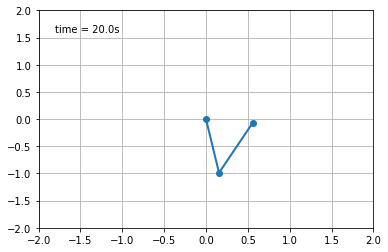

In [4]:
%matplotlib inline
#%matplotlib nbagg

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

print(type(y[0]))

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


plt.rcParams["animation.html"] = "html5"
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),interval=25, blit=True, init_func=init)
ani

#ani.save('double_pendulum.mp4', fps=15)
#HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())
#plt.show()

In [3]:
import matplotlib.animation as manimation; manimation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']